<a href="https://colab.research.google.com/github/Antonio-Richaud/Challenge-Esenciadelcliente/blob/main/Challenge_Esencia_del_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Challenge 2
## Esencia del cliente
#### Autor: <a href="https://antonio-richaud.com/">Antonio Richaud</a>


# 1. Configuración del Ambiente

1. Se conecta el Colab con mi Drive donde ya estan el archivo con el que voy a trabajar :)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Verificamos a ver si ya tenemos todo lo que creo ocupar para el challenge 🤔

In [2]:
!pip show pandas numpy scikit-learn seaborn matplotlib

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

Creo que esta todo bien 🧐<br>
Seguimos... <br>
3. Traigo todas las librerias y herramientas que usaré para el challenge

In [3]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Obtención de los datos

Y obviamente el archivo csv para empezar a darle 😎

In [4]:
df_principal = pd.read_csv('/content/drive/MyDrive/Bootcamp_Datascience/Challenge-Escenciadelcliente/media prediction and its cost.csv')

#Eliminamos la columna de avg_cars_at home(approx).1 porque esta doble en el archivo.
df_principal = df_principal.drop('avg_cars_at home(approx).1', axis = 1)
df_principal

food_category food_department     food_family  \
0      Breakfast Foods    Frozen Foods            Food   
1      Breakfast Foods    Frozen Foods            Food   
2      Breakfast Foods    Frozen Foods            Food   
3      Breakfast Foods    Frozen Foods            Food   
4      Breakfast Foods    Frozen Foods            Food   
...                ...             ...             ...   
60423        Specialty        Carousel  Non-Consumable   
60424        Specialty        Carousel  Non-Consumable   
60425        Specialty        Carousel  Non-Consumable   
60426        Specialty        Carousel  Non-Consumable   
60427        Specialty        Carousel  Non-Consumable   

       store_sales(in millions)  store_cost(in millions)  \
0                          7.36                   2.7232   
1                          5.52                   2.5944   
2                          3.68                   1.3616   
3                          3.68                   1.1776   
4                          4.08                   1.4280   
...                         ...                      ...   
60423                      2.76                   1.3248   
60424                      1.60                   0.4960   
60425                      5.52                   2.5392   
60426                      8.28                   2.5668   
60427                      9.20                   4.2320   

       unit_sales(in millions)         promotion_name sales_country  \
0                          4.0           Bag Stuffers           USA   
1                          3.0  Cash Register Lottery           USA   
2                          2.0    High Roller Savings           USA   
3                          2.0  Cash Register Lottery           USA   
4                          3.0       Double Down Sale           USA   
...                        ...                    ...           ...   
60423                      1.0          You Save Days           USA   
60424                      1.0          Price Cutters           USA   
60425                      2.0       Weekend Markdown           USA   
60426                      3.0             Sales Days        Canada   
60427                      4.0     Super Duper Savers        Canada   

      marital_status gender  ...  grocery_sqft frozen_sqft meat_sqft  \
0                  M      F  ...       18670.0      5415.0    3610.0   
1                  M      M  ...       18670.0      5415.0    3610.0   
2                  S      F  ...       18670.0      5415.0    3610.0   
3                  M      F  ...       18670.0      5415.0    3610.0   
4                  M      M  ...       18670.0      5415.0    3610.0   
...              ...    ...  ...           ...         ...       ...   
60423              M      F  ...       15321.0      4294.0    2863.0   
60424              S      F  ...       15321.0      4294.0    2863.0   
60425              M      M  ...       15321.0      4294.0    2863.0   
60426              S      M  ...       27463.0      4193.0    2795.0   
60427              S      F  ...       27463.0      4193.0    2795.0   

      coffee_bar video_store  salad_bar prepared_food  florist  \
0            1.0         1.0        1.0           1.0      1.0   
1            1.0         1.0        1.0           1.0      1.0   
2            1.0         1.0        1.0           1.0      1.0   
3            1.0         1.0        1.0           1.0      1.0   
4            1.0         1.0        1.0           1.0      1.0   
...          ...         ...        ...           ...      ...   
60423        1.0         0.0        0.0           0.0      0.0   
60424        1.0         0.0        0.0           0.0      0.0   
60425        1.0         0.0        0.0           0.0      0.0   
60426        1.0         0.0        0.0           0.0      1.0   
60427        1.0         0.0        0.0           0.0      1.0   

                    media_type    cost  
0           Daily Paper, Radio  126.62 

A ver cuales son las columnas del DF 🤔

In [5]:
#Nombres de las columnas

df_columns_name = df_principal.columns
df_columns_name

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type',
       'cost'],
      dtype='object')

A ver que tipo de datos traen 🤔

In [6]:
#Tipo de datos que hay en las columnas

df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  object 
 9   gender                    60428 non-null  object 
 10  total_children            60428 non-null  float64
 11  education                 60428 non-null  object 
 12  member_card               60428 non-null  object 
 13  occupation                60428 non-null  object 
 14  houseo

In [7]:
#Verificamos si es que existen valores NaN en las columnas

df_principal.isnull().sum()[:5]

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
dtype: int64

In [8]:
# Validación de las columnas:

columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'miembro',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    #Columna eliminada: 'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

df_principal = df_principal.rename(columns=columnas)
df_principal.columns

Index(['categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'miembro', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'marca', 'precio_recomendado', 'peso_bruto',
       'peso_neto', 'empaque_reciclable', 'bajo_en_grasa', 'unidades_por_caja',
       'comercio', 'ciudad', 'estado', 'pies_cuadrados_tienda',
       'pies_cuadrados_comestibles', 'pies_cuadrados_congelados',
       'pies_cuadrados_carne', 'cafeteria', 'tienda_de_videos',
       'barra_de_ensaladas', 'comida_preparada', 'floristeria', 'divulgacion',
       'costo'],
      dtype='object')

### Análisis de variables

Se cambian los valores segun los diccionarios (El diccionario esta en la tarjeta de Trello)

In [9]:
categoria_alimento = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

miembro = {
    'Bronze':'Bronce',
    'Golden': 'Oro',
    'Silver':'Plata'
}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

pais = {
    'USA':'Estados Unidos',
    'Mexico':'México',
    'Canada':'Canadá'
}

estado_civil = {
    'S':'Soltero', 'M':'Casado'
}

genero ={
    'F':'Femenino',
    'M':'Masculino'
}

vivienda_propia={'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}



comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}


divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

#Columnas a las que se les cambiará el nombre
lista_cambios = [
    ['categoria_alimento', categoria_alimento],
    ['departamento', departamento],
    ['tipo', tipo],
    ['promocion', promocion],
    ['escolaridad', escolaridad],
    ['miembro', miembro],
    ['ocupacion', ocupacion],
    ['pais', pais],
    ['estado_civil', estado_civil],
    ['genero', genero],
    ['vivienda_propia', vivienda_propia],
    ['ingreso_anual', ingreso_anual],
    ['comercio', comercio],
    ['divulgacion', divulgacion],
]

#Cargar columnas de la lista y cambiar valores
for name in lista_cambios:
  df_principal[name[0]] = df_principal[name[0]].replace(name[1])


df_principal.sample(5)


categoria_alimento            departamento    tipo  \
27873      Productos para hornear  Productos para hornear  Comida   
25642                       Fruta       Productos frescos  Comida   
43121  Alimentos para el desayuno    Alimentos congelados  Comida   
20562              Especialidades       Productos frescos  Comida   
5913                    Vegetales       Productos frescos  Comida   

       ventas_tienda(en millones)  costo_tienda(en millones)  \
27873                        9.84                     4.3296   
25642                        6.68                     2.0040   
43121                        4.76                     1.9516   
20562                       10.12                     4.3516   
5913                         8.85                     2.8320   

       ventas_unitarias(en millones)                           promocion  \
27873                            4.0                        Tres por uno   
25642                            2.0     Ahorro para apostadores grandes   
43121                            4.0  Días de liquidación de estanterías   
20562                            4.0              Rebajadores de precios   
5913                             3.0                   Rebajando precios   

                 pais estado_civil     genero  ...  \
27873  Estados Unidos      Soltero   Femenino  ...   
25642  Estados Unidos       Casado  Masculino  ...   
43121          México      Soltero  Masculino  ...   
20562          Canadá       Casado  Masculino  ...   
5913           Canadá       Casado   Femenino  ...   

       pies_cuadrados_comestibles pies_cuadrados_congelados  \
27873                     22123.0                    7041.0   
25642                     14210.0                    5633.0   
43121                     20141.0                    6393.0   
20562                     16418.0                    4016.0   
5913                      16418.0                    4016.0   

      pies_cuadrados_carne cafeteria tienda_de_videos  barra_de_ensaladas  \
27873               4694.0       1.0              0.0                 1.0   
25642               3755.0       0.0              0.0                 0.0   
43121               4262.0       1.0              1.0                 1.0   
20562               2678.0       1.0              1.0                 1.0   
5913                2678.0       1.0              1.0                 1.0   

       comida_preparada  floristeria                             divulgacion  \
27873               1.0          1.0                      Anexo del producto   
25642               0.0          1.0                        Periódico diario   
43121               1.0          1.0                     Periódico dominical   
20562               1.0          1.0  Periódico dominical, radio, televisión   
5913                1.0          1.0            Entrega en el punto de venta   

        costo  
27873  122.47  
25642  101.84  
43121   98.81  
20562   77.24  
5913   122.77  

[5 rows x 39 columns]

In [10]:
#Se asignan las nuevas variables de poblacion_pais y poblacion_ciudad
population_city = {
    "Salem": 152405,
    "Tacoma": 216457,
    "Seattle": 737015,
    "Spokane": 220270,
    "Los Angeles": 3971883,
    "Beverly Hills": 34133,
    "Portland": 653115,
    "Bellingham": 80888,
    "Orizaba": 150000,
    "Merida": 920000,
    "Hidalgo": 214685,
    "Mexico City": 21804515,
    "Vancouver": 2313652,
    "Bremerton": 37056,
    "Camacho": 100000,
    "Guadalajara": 1542000,
    "Acapulco": 763331,
    "San Francisco": 873965,
    "Victoria": 85796
}

population_country = {
    "Estados Unidos": 331002651,  # Población estimada de EUA
    "Canadá": 37742154,  # Población estimada de Canadá
    "México": 128932753  # Población estimada de México
}

#Cruzar valores de poblacion con ciudad
df_principal['poblacion_ciudad'] = df_principal['ciudad'].map(population_city)
df_principal['poblacion_pais'] = df_principal['pais'].map(population_country)

df_principal.sample(5)

categoria_alimento            departamento    tipo  \
32387           Sopa enlatada     Alimentos enlatados  Comida   
40682                     Pan     Productos horneados  Comida   
56707  Productos para hornear  Productos para hornear  Comida   
20355          Especialidades       Productos frescos  Comida   
42308          Cerveza y vino     Bebidas alcohólicas  Bebida   

       ventas_tienda(en millones)  costo_tienda(en millones)  \
32387                        5.44                     2.7200   
40682                        4.82                     1.8798   
56707                       10.36                     3.2116   
20355                        5.70                     1.9380   
42308                        5.58                     2.3436   

       ventas_unitarias(en millones)                    promocion  \
32387                            2.0               Días de ahorro   
40682                            2.0              Estantes vacíos   
56707                            4.0   Descuento de fin de semana   
20355                            2.0  Descuentos de gran magnitud   
42308                            3.0              Venta Ahorra Ya   

                 pais estado_civil     genero  ...  pies_cuadrados_carne  \
32387  Estados Unidos      Soltero  Masculino  ...                3340.0   
40682  Estados Unidos      Soltero   Femenino  ...                3755.0   
56707  Estados Unidos      Soltero   Femenino  ...                1635.0   
20355          México       Casado   Femenino  ...                3375.0   
42308          Canadá      Soltero   Femenino  ...                2678.0   

      cafeteria tienda_de_videos barra_de_ensaladas comida_preparada  \
32387       1.0              1.0                1.0              1.0   
40682       0.0              0.0                0.0              0.0   
56707       0.0              0.0                0.0              0.0   
20355       0.0              0.0                1.0              1.0   
42308       1.0              1.0                1.0              1.0   

       floristeria                             divulgacion   costo  \
32387          1.0  Periódico dominical, radio, televisión   67.11   
40682          1.0     Periódico diario, radio, televisión  107.89   
56707          0.0                        Periódico diario  140.57   
20355          0.0                        Periódico diario   95.98   
42308          1.0                      Cupón en la tienda   75.22   

      poblacion_ciudad  poblacion_pais  
32387            34133       331002651  
40682          3971883       331002651  
56707           653115       331002651  
20355           150000       128932753  
42308          2313652        37742154  

[5 rows x 41 columns]

In [11]:
df_principal.to_csv('/content/drive/MyDrive/Bootcamp_Datascience/Challenge-Escenciadelcliente/dfatrabajar.csv', index=False)

## Separación de los dataframes

* Dataframe de los clientes: df_clientes
* Dataframe Tienda: df_tienda
* Dataframe Venta: df_venta

### Dataframe de los clientes

In [12]:
#Dataframe de cliente
df_clientes = df_principal[[
    'pais',
    'estado_civil',
    'genero',
    'total_de_hijos',
    'escolaridad',
    'miembro',
    'ocupacion',
    'vivienda_propia',
    'promedio_autos(aprox)',
    'ingreso_anual',
    'numero_hijos',
    'ciudad',
    'costo',
    'poblacion_ciudad',
    'poblacion_pais'
]]


df_clientes.to_csv('/content/drive/MyDrive/Bootcamp_Datascience/Challenge-Escenciadelcliente/dfcliente.csv', index=False)

df_clientes

pais estado_civil     genero  total_de_hijos escolaridad  \
0      Estados Unidos       Casado   Femenino             1.0    Primaria   
1      Estados Unidos       Casado  Masculino             0.0    Superior   
2      Estados Unidos      Soltero   Femenino             4.0    Primaria   
3      Estados Unidos       Casado   Femenino             2.0  Secundaria   
4      Estados Unidos       Casado  Masculino             0.0    Primaria   
...               ...          ...        ...             ...         ...   
60423  Estados Unidos       Casado   Femenino             1.0    Primaria   
60424  Estados Unidos      Soltero   Femenino             2.0  Secundaria   
60425  Estados Unidos       Casado  Masculino             1.0  Secundaria   
60426          Canadá      Soltero  Masculino             2.0    Superior   
60427          Canadá      Soltero   Femenino             3.0    Primaria   

      miembro    ocupacion vivienda_propia  promedio_autos(aprox)  \
0      Normal      Técnico              Sí                    1.0   
1       Plata  Profesional              Sí                    4.0   
2      Normal       Obrero              No                    1.0   
3      Bronce       Obrero              Sí                    2.0   
4      Bronce      Técnico              No                    2.0   
...       ...          ...             ...                    ...   
60423  Normal      Técnico              Sí                    1.0   
60424  Bronce      Técnico              No                    2.0   
60425  Bronce       Obrero              Sí                    3.0   
60426  Bronce  Profesional              No                    4.0   
60427  Bronce       Obrero              Sí                    1.0   

       ingreso_anual  numero_hijos         ciudad   costo  poblacion_ciudad  \
0              20000           1.0          Salem  126.62            152405   
1              60000           0.0          Salem   59.86            152405   
2              20000           0.0          Salem   84.16            152405   
3              40000           2.0          Salem   95.78            152405   
4              40000           0.0          Salem   50.79            152405   
...              ...           ...            ...     ...               ...   
60423          20000           1.0  San Francisco   95.25            873965   
60424          40000           0.0  San Francisco   69.42            873965   
60425          40000           0.0  San Francisco   67.51            873965   
60426          80000           0.0       Victoria  132.88             85796   
60427          20000           0.0       Victoria   87.76             85796   

       poblacion_pais  
0           331002651  
1           331002651  
2           331002651  
3           331002651  
4           331002651  
...               ...  
60423       331002651  
60424       331002651  
60425       331002651  
60426        37742154  
60427        37742154  

[60428 rows x 15 columns]

### Dataframe tienda

In [13]:
#Dataframe tienda
df_tienda = df_principal[[
    'pais',
    'ciudad',
    'ventas_tienda(en millones)',
    'costo_tienda(en millones)',
    'ventas_unitarias(en millones)',
    'pies_cuadrados_tienda',
    'pies_cuadrados_comestibles',
    'pies_cuadrados_congelados',
    'pies_cuadrados_carne',
    'cafeteria',
    'tienda_de_videos',
    'barra_de_ensaladas',
    'comida_preparada',
    'floristeria',
    'poblacion_ciudad',
    'poblacion_pais'
]]


df_tienda.to_csv('/content/drive/MyDrive/Bootcamp_Datascience/Challenge-Escenciadelcliente/dftienda.csv', index=False)

df_tienda.sample(5)

pais       ciudad  ventas_tienda(en millones)  \
45345  Estados Unidos      Spokane                        9.84   
42901  Estados Unidos  Los Angeles                        3.48   
31967  Estados Unidos      Seattle                        4.66   
9577           México       Merida                        4.88   
17145  Estados Unidos       Tacoma                       11.40   

       costo_tienda(en millones)  ventas_unitarias(en millones)  \
45345                     4.2312                            3.0   
42901                     1.6704                            4.0   
31967                     1.5844                            2.0   
9577                      1.5616                            2.0   
17145                     3.4200                            3.0   

       pies_cuadrados_tienda  pies_cuadrados_comestibles  \
45345                30268.0                     22063.0   
42901                23598.0                     14210.0   
31967                21215.0                     13305.0   
9577                 30797.0                     20141.0   
17145                33858.0                     22123.0   

       pies_cuadrados_congelados  pies_cuadrados_carne  cafeteria  \
45345                     4923.0                3282.0        0.0   
42901                     5633.0                3755.0        0.0   
31967                     4746.0                3164.0        1.0   
9577                      6393.0                4262.0        1.0   
17145                     7041.0                4694.0        1.0   

       tienda_de_videos  barra_de_ensaladas  comida_preparada  floristeria  \
45345               0.0                 0.0               0.0          0.0   
42901               0.0                 0.0               0.0          1.0   
31967               0.0                 0.0               0.0          0.0   
9577                1.0                 1.0               1.0          1.0   
17145               0.0                 1.0               1.0          1.0   

       poblacion_ciudad  poblacion_pais  
45345            220270       331002651  
42901           3971883       331002651  
31967            737015       331002651  
9577             920000       128932753  
17145            216457       331002651

### Dataframe venta

In [14]:
#Dataframe Venta
df_venta = df_principal[[
    'pais',
    'ciudad',
    'categoria_alimento',
    'departamento',
    'tipo',
    'promocion',
    'empaque_reciclable',
    'bajo_en_grasa',
    'unidades_por_caja',
    'comercio',
    'estado',
    'divulgacion',
    'marca',
    'precio_recomendado',
    'peso_bruto',
    'peso_neto',
    'poblacion_ciudad',
    'poblacion_pais'
]]


df_venta.to_csv('/content/drive/MyDrive/Bootcamp_Datascience/Challenge-Escenciadelcliente/dfventa.csv', index=False)

df_venta.sample(5)

pais    ciudad      categoria_alimento  \
56725  Estados Unidos  Portland  Productos para hornear   
1456   Estados Unidos   Spokane  Productos para hornear   
15028  Estados Unidos     Salem     Mermeladas y jaleas   
47526  Estados Unidos     Salem                   Pizza   
56396          México   Camacho                Revistas   

                   departamento           tipo  \
56725    Productos para hornear         Comida   
1456     Productos para hornear         Comida   
15028    Productos para hornear         Comida   
47526      Alimentos congelados         Comida   
56396  Publicaciones periódicas  No comestible   

                             promocion  empaque_reciclable  bajo_en_grasa  \
56725                Ahorro de precios                 1.0            0.0   
1456                     Días de venta                 0.0            0.0   
15028           Venta No Puedo Creerlo                 1.0            0.0   
47526  Lotería de la caja registradora                 1.0            0.0   
56396                  Estantes vacíos                 1.0            0.0   

       unidades_por_caja              comercio     estado  \
56725               14.0          Supermercado         OR   
1456                 8.0          Supermercado         WA   
15028                6.0  Supermercado de lujo         OR   
47526               33.0  Supermercado de lujo         OR   
56396               14.0  Supermercado gourmet  Zacatecas   

                   divulgacion    marca  precio_recomendado  peso_bruto  \
56725       Anexo del producto      CDR                2.38        16.1   
1456             Correo masivo      CDR                1.39         8.7   
15028       Anexo del producto    Plato                2.28        12.7   
47526  Periódico diario, radio  Imagine                2.70        16.2   
56396  Periódico diario, radio   Dollar                2.15        16.4   

       peso_neto  poblacion_ciudad  poblacion_pais  
56725      14.10            653115       331002651  
1456        7.69            220270       331002651  
15028      10.60            152405       331002651  
47526      15.20            152405       331002651  
56396      14.30            100000       128932753

# 3. Exploración de los datos

In [15]:
#Se traen nuevamente los datos
df_trabajar = pd.read_csv('/content/drive/MyDrive/Bootcamp_Datascience/Challenge-Escenciadelcliente/dfatrabajar.csv')
df_trabajar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

Empezamos con el análisis de los datos mediante metodos graficos

###  (1) Nivel escolarizacion de ocupacion por pais

*Consideraciones: Se asignara por proporcion los valores de cada "total" por pais y Se asignara en cada columna el valor que corresponde por pais como header respetando sus valores originales*  

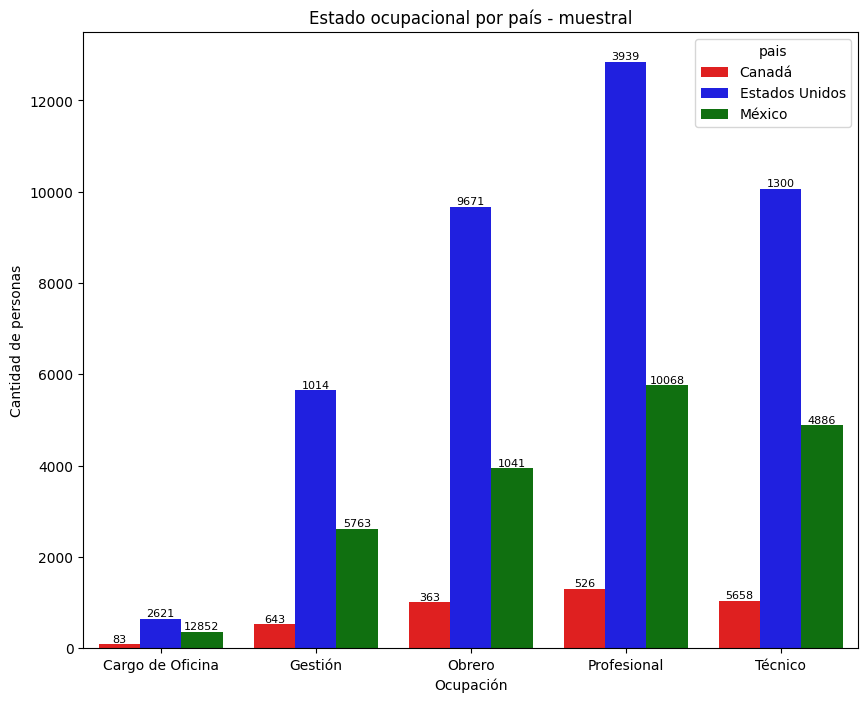

In [16]:
# Ejemplo de datos:
# df_trabajar = pd.DataFrame({
#     'ocupacion': ['ingeniero', 'medico', 'profesor', 'ingeniero', 'medico'],
#     'pais': ['México', 'México', 'Estados Unidos', 'Canadá', 'México']
# })

# Se cargan las columnas de interés
df_ocup_pais = df_trabajar[['ocupacion', 'pais']]

# Se crea agrupación por ocupación y país
df_ocup_pais_g = df_ocup_pais.groupby(['ocupacion','pais']).size().reset_index()
df_ocup_pais_g.columns = ['ocupacion','pais','total']

# Asignamos el tamaño
plt.figure(figsize=(10,8))

# Definimos una paleta de colores personalizada para los países
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

# Gráfico de histograma por datos
sns.barplot(
    x="ocupacion",
    y="total",
    hue="pais",
    data=df_ocup_pais_g,
    saturation=0.75,
    palette=palette
)

# Añadimos las etiquetas de texto
for i, bar in enumerate(plt.gca().patches):
    # Ajustamos el índice para que no exceda la longitud de df_ocup_pais_g['total']
    if i < len(df_ocup_pais_g):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height(),
            df_ocup_pais_g['total'].iloc[i],
            ha="center",
            va="bottom",
            fontsize=8
        )

plt.title('Estado ocupacional por país - muestral')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de personas')

plt.show()

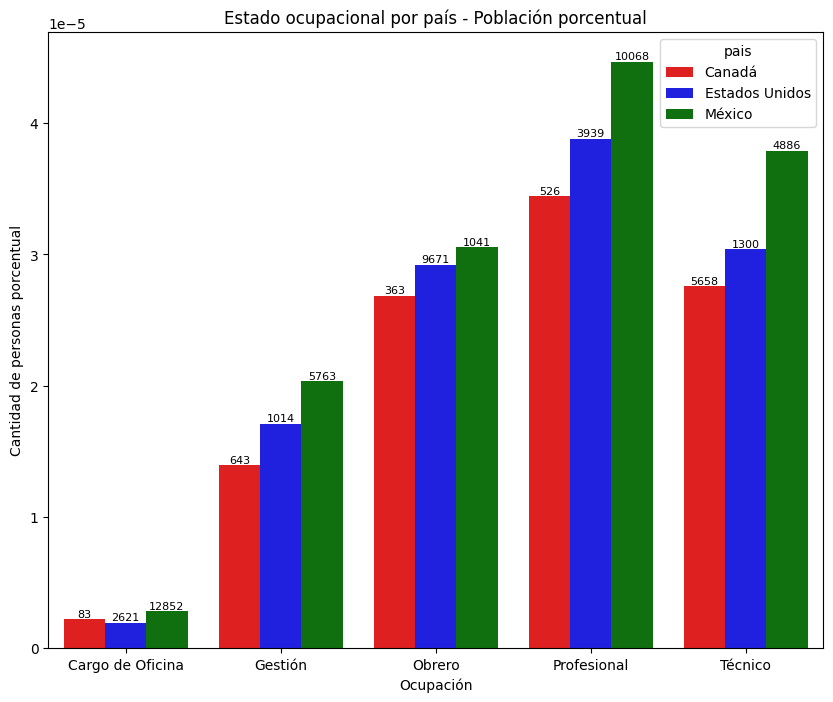

In [17]:
# Ejemplo de datos:
# df_clientes = pd.DataFrame({
#     'ocupacion': ['ingeniero', 'medico', 'profesor', 'ingeniero', 'medico'],
#     'pais': ['México', 'México', 'Estados Unidos', 'Canadá', 'México'],
#     'poblacion_pais': [126190788, 126190788, 331002651, 37742154, 126190788]
# })

# Cargamos las columnas de interés
df_ocup_pais = df_clientes[['ocupacion', 'pais', 'poblacion_pais']]

# Creamos agrupación por ocupación y país
df_ocup_pais_g = df_ocup_pais.groupby(['ocupacion', 'pais', 'poblacion_pais']).size().reset_index()
df_ocup_pais_g.columns = ['ocupacion', 'pais', 'poblacion_pais', 'total']
df_ocup_pais_g['densidad_pais'] = df_ocup_pais_g['total'] / df_ocup_pais_g['poblacion_pais']

# Asignamos el tamaño
plt.figure(figsize=(10,8))

# Definimos una paleta de colores personalizada para los países
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

# Gráfico de histograma por datos
sns.barplot(
    x="ocupacion",
    y="densidad_pais",
    hue="pais",
    data=df_ocup_pais_g,
    saturation=0.75,
    palette=palette
)

# Añadimos las etiquetas de texto
for i, bar in enumerate(plt.gca().patches):
    # Ajustamos el índice para que no exceda la longitud de df_ocup_pais_g['total']
    if i < len(df_ocup_pais_g):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height(),
            df_ocup_pais_g['total'].iloc[i],
            ha="center",
            va="bottom",
            fontsize=8
        )

plt.title('Estado ocupacional por país - Población porcentual')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de personas porcentual')

plt.show()

### (2) Ventas de unidades por tipo de producto separado por pais

*Consideraciones: Se asignara por proporcion los valores de cada "ventas_unitarias(en millones)" por pais y se asignara en cada columna el valor que corresponde por pais como header respetando sus valores originales*

In [18]:
#Gráfico de ventas_productos, por departamento y pais

df_rel2 = pd.concat([
    df_tienda[['pais','ventas_tienda(en millones)','ventas_unitarias(en millones)']],
    df_venta[['tipo','poblacion_pais']]
    ], axis = 1
    )

#Agrupamos por país y tipo
rel2_group = df_rel2.groupby(['pais','tipo','poblacion_pais'])

#Conteo por tipo
rel2_tipo_count = rel2_group.size()

#Obtenemos ventas asociadas a esa agrupacion
rel2_ventas_sum = rel2_group.sum()['ventas_tienda(en millones)']

#Creamos el df
df_paisTipoVenta = pd.DataFrame(
    {
        'cantidad_producto' : rel2_tipo_count,
        'ventas_tienda(en millones)': rel2_ventas_sum
    }
)

df_paisTipoVenta = df_paisTipoVenta.reset_index()
df_paisTipoVenta.sample(5)

pais           tipo  poblacion_pais  cantidad_producto  \
1          Canadá         Comida        37742154               2810   
6          México         Bebida       128932753               1637   
5  Estados Unidos  No comestible       331002651               7390   
0          Canadá         Bebida        37742154                345   
3  Estados Unidos         Bebida       331002651               3589   

   ventas_tienda(en millones)  
1                    18725.01  
6                    10140.17  
5                    48682.89  
0                     2092.52  
3                    21945.71

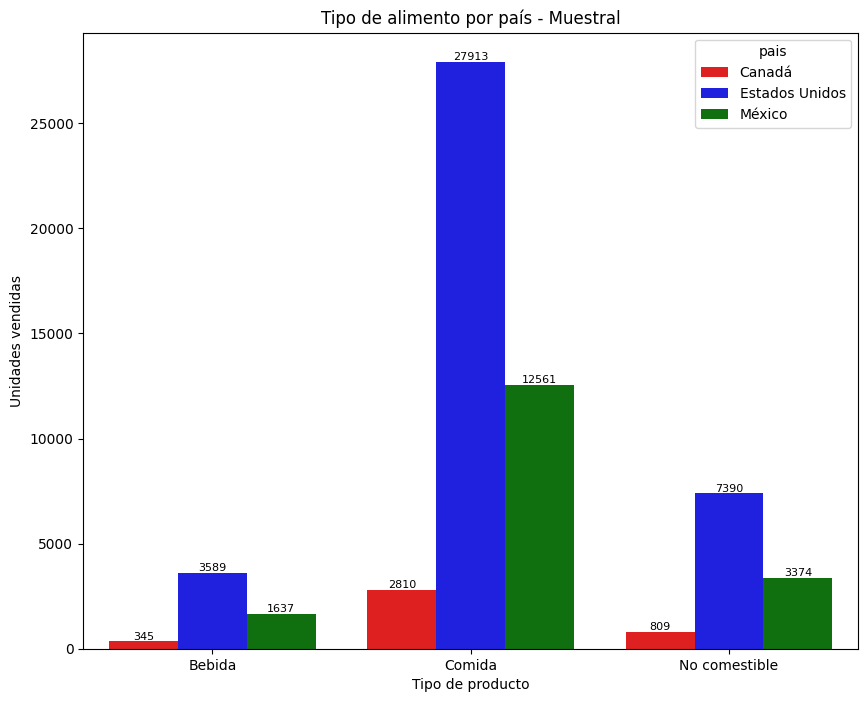

In [19]:
# Creamos una figura
fig, ax = plt.subplots(figsize=(10,8))

# Definimos una paleta de colores personalizada para los países
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

# Gráfico de tipo de producto por país
sns.barplot(
    x="tipo",
    y="cantidad_producto",
    hue="pais",
    data=df_paisTipoVenta,
    saturation=0.75,
    palette=palette
)

# Añadimos las etiquetas de texto
for i, bar in enumerate(plt.gca().patches):
    # Ajustamos el índice para que no exceda la longitud de df_paisTipoVenta['cantidad_producto']
    if i < len(df_paisTipoVenta):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height(),
            df_paisTipoVenta['cantidad_producto'].iloc[i],
            ha="center",
            va="bottom",
            fontsize=8
        )

# Establecemos el título y las etiquetas de los ejes
plt.title('Tipo de alimento por país - Muestral')
plt.xlabel('Tipo de producto')
plt.ylabel('Unidades vendidas')

# Mostramos el gráfico
plt.show()

# Nota: Considera relacionar la cantidad de población para revisar la densidad poblacional y definir correctamente la proporcionalidad.

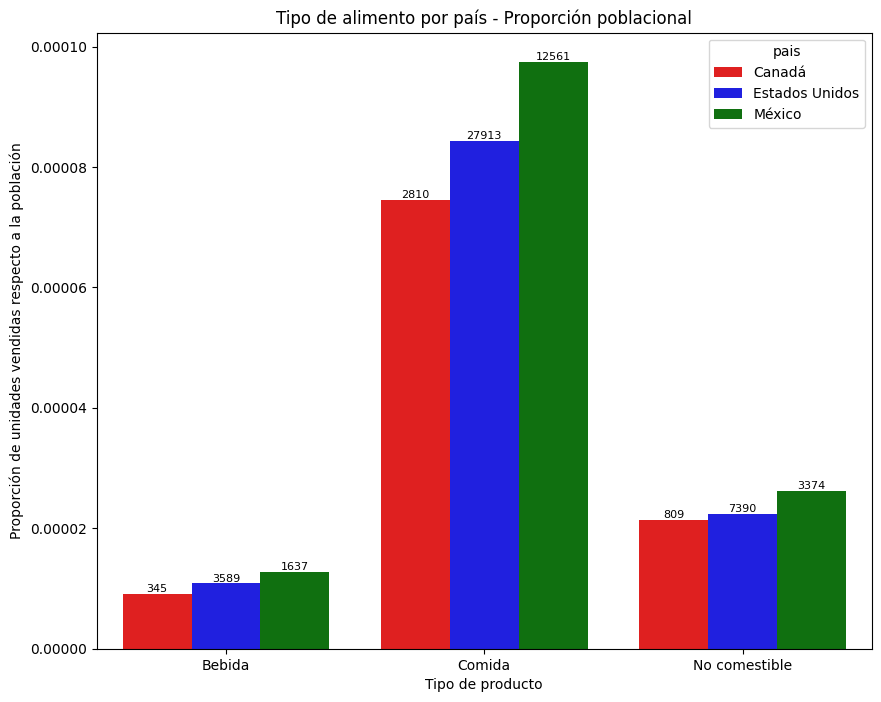

In [20]:
# Crear una figura
fig, ax = plt.subplots(figsize=(10,8))

# Calcular la proporción de productos respecto a la población del país
df_paisTipoVenta['proporcion_productos'] = df_paisTipoVenta['cantidad_producto'] / df_paisTipoVenta['poblacion_pais']

# Definimos una paleta de colores personalizada para los países
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

# Gráfico de tipo de producto por país
sns.barplot(
    x="tipo",
    y="proporcion_productos",
    hue="pais",
    data=df_paisTipoVenta,
    saturation=0.75,
    palette=palette
)

# Añadir etiquetas de texto
for i, bar in enumerate(plt.gca().patches):
    # Ajustar el índice para que no exceda la longitud de df_paisTipoVenta['cantidad_producto']
    if i < len(df_paisTipoVenta):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height(),
            df_paisTipoVenta['cantidad_producto'].iloc[i],
            ha="center",
            va="bottom",
            fontsize=8
        )

# Establecemos el título y las etiquetas de los ejes
plt.title('Tipo de alimento por país - Proporción poblacional')
plt.xlabel('Tipo de producto')
plt.ylabel('Proporción de unidades vendidas respecto a la población')

# Mostrar el gráfico
plt.show()

In [21]:
# Cargo las columnas de interés
df_rel3 = df_tienda[['pais', 'ciudad', 'ventas_tienda(en millones)', 'costo_tienda(en millones)', 'ventas_unitarias(en millones)', 'poblacion_ciudad']]

# Sumo la cantidad de ventas y costos por ciudad, agrupando por país, ciudad y población
ventas_tienda = df_rel3.groupby(['pais', 'ciudad', 'poblacion_ciudad']).sum()

# Creo una columna de utilidad restando los costos a las ventas
ventas_tienda['Utilidad(en millones)'] = ventas_tienda['ventas_tienda(en millones)'] - ventas_tienda['costo_tienda(en millones)']

# Ordeno las filas por país y utilidad
ventas_tienda.sort_values(['pais', 'Utilidad(en millones)'])

# Creo una columna que indique la diferencia de cada registro con la media de las utilidades
ventas_tienda['Media_utilidad'] = ventas_tienda['Utilidad(en millones)'] - ventas_tienda['Utilidad(en millones)'].mean()

# Restablezco el índice del DataFrame
ventas_tienda = ventas_tienda.reset_index()

# Elimino las columnas de ventas y costos ya que no las necesito más
ventas_tienda = ventas_tienda.drop(['ventas_tienda(en millones)', 'costo_tienda(en millones)'], axis=1)

# Muestra una muestra aleatoria de 5 filas del DataFrame para revisar los datos
ventas_tienda.sample(5)

pais       ciudad  poblacion_ciudad  \
15          México      Hidalgo            214685   
14          México  Guadalajara           1542000   
13          México      Camacho            100000   
6   Estados Unidos     Portland            653115   
18          México      Orizaba            150000   

    ventas_unitarias(en millones)  Utilidad(en millones)  Media_utilidad  
15                        15080.0             18966.0237     6493.776263  
14                          717.0               833.1146   -11639.132837  
13                         7360.0              9270.2043    -3202.043137  
6                         16279.0             20848.9603     8376.712863  
18                         8226.0             10334.8225    -2137.424937

### (3) Ventas en millones de $ por ciudad separado por pais

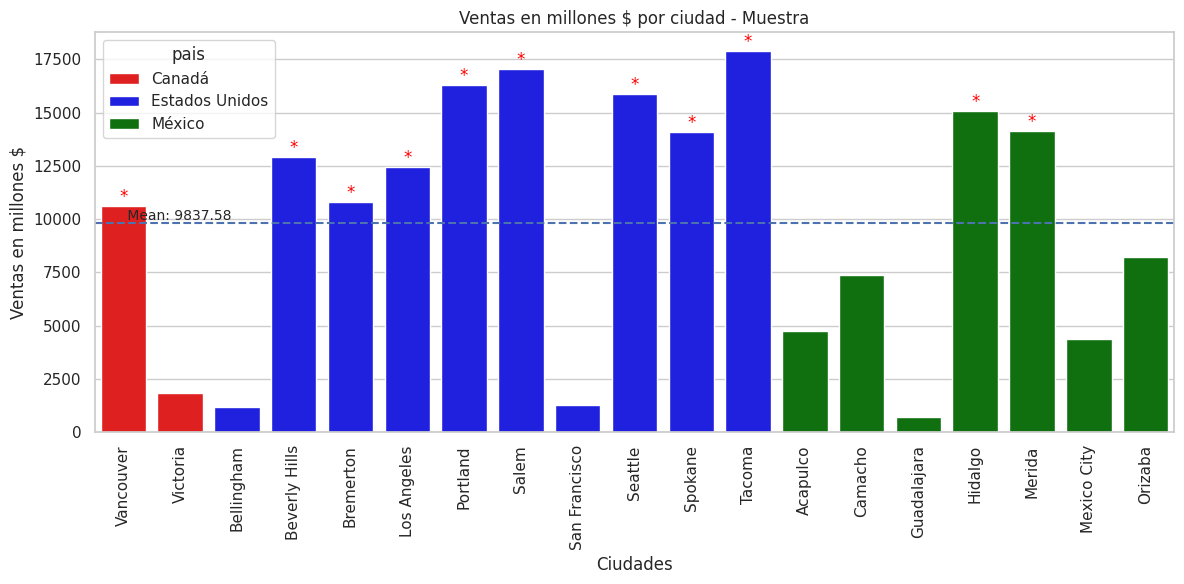

In [22]:
# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura para el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

# Definir una paleta de colores personalizada para los países
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

# Crear un gráfico de barras agrupadas para las ventas unitarias por ciudad y país
sns.barplot(
    x="ciudad",
    y="ventas_unitarias(en millones)",
    hue="pais",
    data=ventas_tienda,
    palette=palette,
    errorbar=None
)

# Establecer el título y las etiquetas de los ejes del gráfico
plt.title("Ventas en millones $ por ciudad - Muestra")
plt.xlabel("Ciudades")
plt.ylabel("Ventas en millones $")

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Ajustar el diseño para evitar que las etiquetas se corten
plt.tight_layout()

# Calcular el valor promedio de las ventas unitarias
mean_value = ventas_tienda['ventas_unitarias(en millones)'].mean()

# Añadir una línea horizontal en el gráfico que representa el valor promedio de las ventas
plt.axhline(mean_value, linestyle='--', label='Promedio ventas globales')

# Añadir una etiqueta de texto para indicar el valor promedio en la línea horizontal
plt.text(
    0,
    mean_value,
    f' Mean: {mean_value:.2f}',
    va='bottom',
    ha='left',
    fontsize=10
)

# Añadir asteriscos (*) sobre las barras que superan el valor promedio
for index, row in ventas_tienda.iterrows():
    ciudad_index = list(ventas_tienda['ciudad']).index(row['ciudad'])
    if row['ventas_unitarias(en millones)'] > mean_value:
        plt.text(
            ciudad_index,
            row['ventas_unitarias(en millones)'],
            '*',
            ha='center',
            va='bottom',
            fontsize=12,
            color='red'
        )

# Mostrar el gráfico
plt.show()

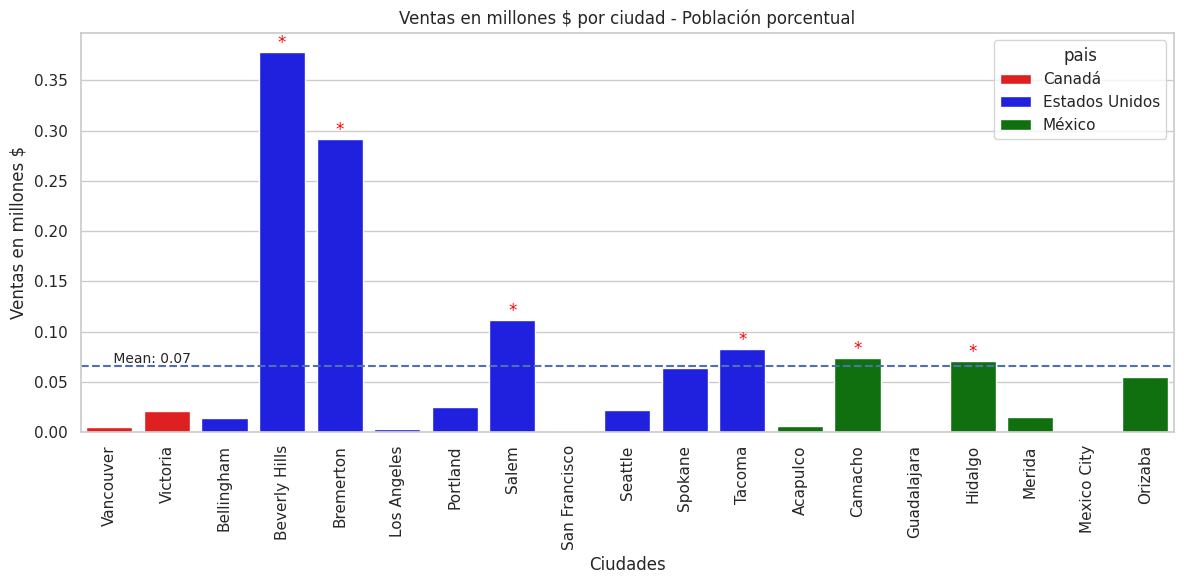

In [23]:
# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura para el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

# Definir una paleta de colores personalizada para los países
palette = {'Canadá': 'red', 'Estados Unidos': 'blue', 'México': 'green'}

# Calcular la densidad de ventas dividiendo las ventas unitarias por la población de la ciudad
ventas_tienda['ventas_densidad'] = ventas_tienda['ventas_unitarias(en millones)'] / ventas_tienda['poblacion_ciudad']

# Crear un gráfico de barras agrupadas para la densidad de ventas por ciudad y país
sns.barplot(
    x="ciudad",
    y="ventas_densidad",
    hue="pais",
    data=ventas_tienda,
    palette=palette,
    errorbar=None
)

# Establecer el título y las etiquetas de los ejes del gráfico
plt.title("Ventas en millones $ por ciudad - Población porcentual")
plt.xlabel("Ciudades")
plt.ylabel("Ventas en millones $")

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Ajustar el diseño para evitar que las etiquetas se corten
plt.tight_layout()

# Calcular el valor promedio de la densidad de ventas
mean_value = ventas_tienda['ventas_densidad'].mean()

# Añadir una línea horizontal en el gráfico que representa el valor promedio de la densidad de ventas
plt.axhline(mean_value, linestyle='--', label='Promedio ventas globales')

# Añadir una etiqueta de texto para indicar el valor promedio en la línea horizontal
plt.text(
    0,
    mean_value,
    f' Mean: {mean_value:.2f}',
    va='bottom',
    ha='left',
    fontsize=10
)

# Añadir asteriscos (*) sobre las barras que superen el valor promedio
for index, row in ventas_tienda.iterrows():
    ciudad_index = list(ventas_tienda['ciudad']).index(row['ciudad'])
    if row['ventas_densidad'] > mean_value:
        plt.text(
            ciudad_index,
            row['ventas_densidad'],
            '*',
            ha='center',
            va='bottom',
            fontsize=12,
            color='red'
        )

# Mostrar el gráfico
plt.show()

### (4) Ingreso anual por ciudad separado por genero

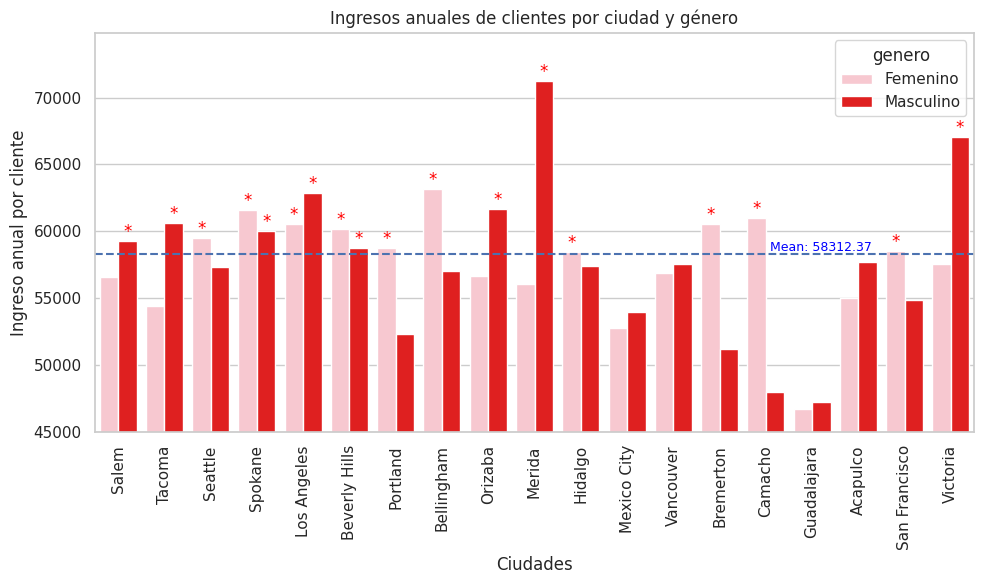

In [24]:
# Configuro el estilo de Seaborn
sns.set(style="whitegrid")

# Creo una figura para el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))  # Reduzco el tamaño de la figura

# Defino una paleta de colores personalizada para los géneros
palette = {'Masculino': 'red', 'Femenino': 'pink'}

# Creo el gráfico de barras agrupadas para el ingreso anual por ciudad y género
sns.barplot(
    x="ciudad",
    y="ingreso_anual",
    hue="genero",
    data=df_clientes,
    palette=palette,
    errorbar=None
)

# Establezco el título y las etiquetas de los ejes del gráfico
plt.title("Ingresos anuales de clientes por ciudad y género")
plt.xlabel("Ciudades")
plt.ylabel("Ingreso anual por cliente")

# Ajusto la rotación de las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Ajusto el diseño para evitar que las etiquetas se corten
plt.tight_layout()

# Calculo el valor promedio del ingreso anual
mean_value = df_clientes['ingreso_anual'].mean()

# Añado una línea horizontal que representa el valor promedio del ingreso anual
plt.axhline(mean_value, linestyle='--', label='Promedio ventas globales')

# Añado una etiqueta de texto para indicar el valor promedio en la línea horizontal
plt.text(
    14,
    mean_value,
    f' Mean: {mean_value:.2f}',
    va='bottom',
    ha='left',
    fontsize=9,
    color='blue'
)

# Establezco el límite inferior del eje y
plt.ylim(45000, plt.ylim()[1])  # Elimino el tercer argumento para el límite superior

# Añado asteriscos (*) sobre las barras que superen el valor promedio
for i, bar in enumerate(plt.gca().patches):
    if bar.get_height() > mean_value:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            '*',
            ha='center',
            va='bottom',
            color='red'
        )

# Muestro el gráfico
plt.show()

### (5) Ingreso anual por pais separado por genero

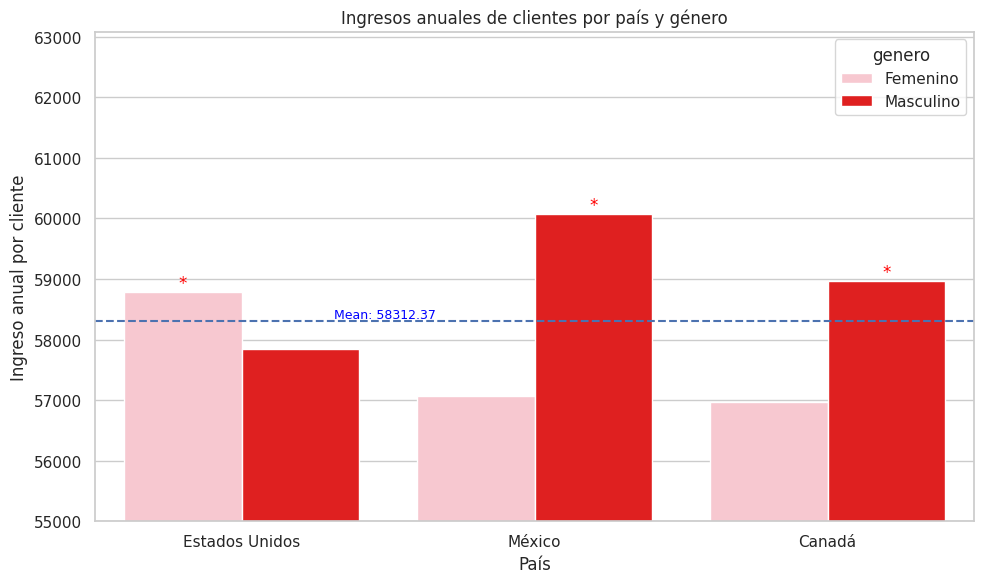

In [25]:
# Configuro el estilo de Seaborn
sns.set(style="whitegrid")

# Creo una figura para el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))  # Reduzco el tamaño de la figura

# Defino una paleta de colores personalizada para los géneros
palette = {'Masculino': 'red', 'Femenino': 'pink'}

# Creo el gráfico de barras agrupadas para el ingreso anual por país y género
sns.barplot(
    x="pais",
    y="ingreso_anual",
    hue="genero",
    data=df_clientes,
    palette=palette,
    errorbar=None
)

# Establezco el título y las etiquetas de los ejes del gráfico
plt.title("Ingresos anuales de clientes por país y género")
plt.xlabel("País")
plt.ylabel("Ingreso anual por cliente")

# Ajusto el diseño para evitar que las etiquetas se corten
plt.tight_layout()

# Calculo el valor promedio del ingreso anual
mean_value = df_clientes['ingreso_anual'].mean()

# Añado una línea horizontal que representa el valor promedio del ingreso anual
plt.axhline(mean_value, linestyle='--', label='Promedio ventas globales')

# Añado una etiqueta de texto para indicar el valor promedio en la línea horizontal
plt.text(
    0.3,
    mean_value,
    f' Mean: {mean_value:.2f}',
    va='bottom',
    ha='left',
    fontsize=9,
    color='blue'
)

# Establezco el límite inferior del eje y
plt.ylim(55000, plt.ylim()[1])  # Elimino el tercer argumento para el límite superior

# Añado asteriscos (*) sobre las barras que superen el valor promedio
for i, bar in enumerate(plt.gca().patches):
    if bar.get_height() > mean_value:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            '*',
            ha='center',
            va='bottom',
            color='red'
        )

# Muestro el gráfico
plt.show()

### (6) Relacion de genero por tipo de empaque del producto separado por miembro

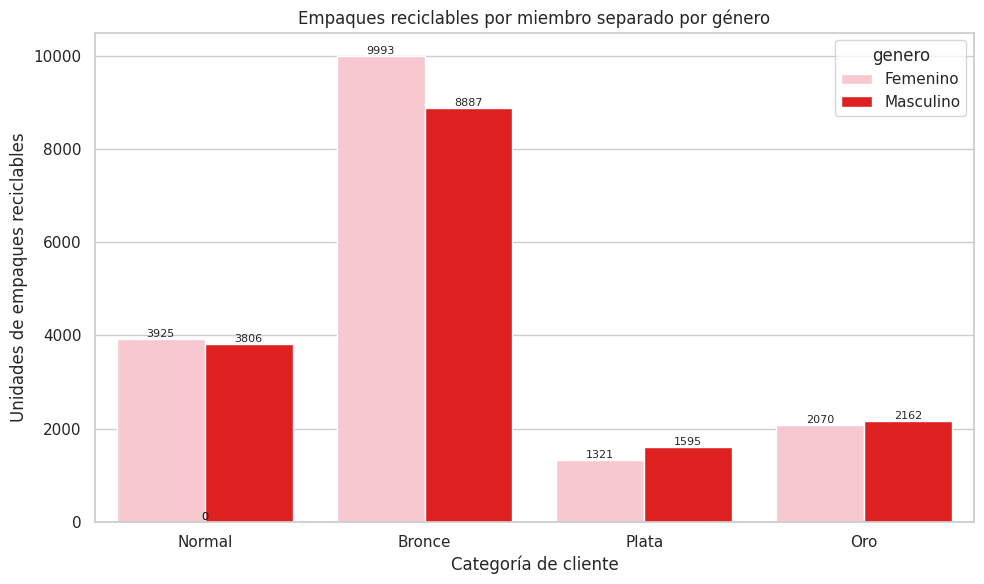

In [26]:
# Configuro el estilo de Seaborn
sns.set(style="whitegrid")

# Creo una figura para el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))  # Reduzco el tamaño de la figura

# Concateno las columnas de interés de los DataFrames individualizados
df_rel4 = pd.concat(
    [df_clientes[['miembro', 'genero']], df_venta['empaque_reciclable']],
    axis=1
)

# Sumo la cantidad de registros de empaques reciclables por miembro y género
df_rel4 = df_rel4.groupby(['miembro', 'genero']).sum().reset_index()

# Defino el orden deseado de las categorías de miembros
orden_miembros = ['Normal', 'Bronce', 'Plata', 'Oro']

# Defino una paleta de colores personalizada para los géneros
palette = {'Masculino': 'red', 'Femenino': 'pink'}

# Genero un gráfico de barras con el orden especificado para los miembros
ax = sns.barplot(
    x="miembro",
    y="empaque_reciclable",
    hue="genero",
    data=df_rel4,
    order=orden_miembros,
    errorbar=None,
    palette=palette
)

# Establezco el título y las etiquetas de los ejes del gráfico
plt.title("Empaques reciclables por miembro separado por género")
plt.xlabel("Categoría de cliente")
plt.ylabel("Unidades de empaques reciclables")

# Ajusto el diseño para evitar que las etiquetas se corten
plt.tight_layout()

# Añado etiquetas en la parte superior de cada barra
for bar in ax.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height())}",  # Convierto el valor a entero y lo agrego como etiqueta
        ha="center",
        va="bottom",
        fontsize=8
    )

# Muestro el gráfico
plt.show()

# 4. Preprocesamiento y Obtención de Features

### Análisis Clusterizado por DataFrame

**Variables de Interés**
<br>
<br>
*(A) Variables de Categorización y Agrupación Acumulativas*

* tipo
* pais
* miembro
* ciudad
<br>
<br>
Consideraremos estas variables porque contienen un número determinado de categorías, lo que abarca lo fundamental para la elección de modelos. La categorización y agrupación de estas variables nos permitirá analizar patrones específicos y segmentar nuestros datos de manera eficiente.

*(B) Variables Numéricas*

* ventas_unitarias (en millones)
* total_de_hijos
* ingreso_anual
* precio_recomendado
<br>
<br>
Estas variables son numéricas y permiten establecer márgenes de asociación entre diferentes variables. Su inclusión en el análisis ayudará a identificar tendencias cuantitativas y a realizar comparaciones precisas entre los diferentes grupos categorizados.

*(C) Variables Booleanas*

* estado_civil
* genero
* barra_de_ensaladas
* comida_preparada
<br>
<br>
Consideramos estas variables como booleanas para facilitar la asignación de modelos de entrenamiento directos. Estas variables binarias nos permiten clasificar y segmentar los datos de manera efectiva, simplificando el proceso de modelado y análisis.

In [28]:
#Dataframe que se van a utilizar: df_modelos

df_modelos = df_trabajar[[
    'tipo','pais','miembro',
    'cafeteria','total_de_hijos','ingreso_anual',
    'estado_civil','genero','comida_preparada',
]]

df_modelos.sample(5)

tipo            pais miembro  cafeteria  total_de_hijos  \
26678         Comida          México  Bronce        0.0             1.0   
22086  No comestible  Estados Unidos  Normal        1.0             0.0   
47713         Comida  Estados Unidos     Oro        1.0             4.0   
34629  No comestible          México  Bronce        1.0             3.0   
38671         Comida  Estados Unidos  Bronce        0.0             0.0   

       ingreso_anual estado_civil     genero  comida_preparada  
26678          60000       Casado   Femenino               0.0  
22086          20000       Casado  Masculino               1.0  
47713          80000       Casado   Femenino               0.0  
34629          40000      Soltero   Femenino               1.0  
38671          40000       Casado   Femenino               0.0

#### Modelo y dummies variables
*(a) tipo*

* "Comida": 0
* "Bebestible": 1
* "No comestible": 2
<br>

*(b) pais*

* "Estados Unidos" : 0
* "Mexico" : 1
* "Canadá" : 2
<br>

*(c) miembro*

* "Normal" : 0
* "Bronce" : 1
* "Plata" : 2
* "Oro" : 3
<br>

*(d) estado_civil*

* "Casado" : 0
* "Soltero" : 1
<br>

*(e) genero*

* "Masculino" : 0
* "Femenino" : 1

In [29]:
# Solo consideraremos las siguientes si tuviéramos modelos basados en no binarios
# tipo_map = {'Comida': 0, 'Bebida': 1, 'No comestible': 2}
# pais_map = {'Estados Unidos': 0, 'México': 1, 'Canadá': 2}

# Mapas de transformación para variables categóricas a numéricas
estado_civil_map = {'Casado': 0, 'Soltero': 1}
genero_map = {'Masculino': 0, 'Femenino': 1}
miembro_map = {'Normal': 0, 'Bronce': 1, 'Plata': 2, 'Oro': 3}

# Crear variables dummy para las columnas categóricas 'tipo' y 'pais'
dummies_tipo = pd.get_dummies(df_modelos['tipo'], prefix='tipo')
dummies_pais = pd.get_dummies(df_modelos['pais'], prefix='pais')
# dummies_miembro = pd.get_dummies(df_modelos['miembro'], prefix='miembro')

# Concateno las variables dummy al DataFrame original
df_modelos = pd.concat([df_modelos, dummies_tipo, dummies_pais], axis=1)

# Elimino las columnas originales que se convirtieron a variables dummy
df_modelos.drop(['tipo', 'pais'], axis=1, inplace=True)

# Mapa de cambios de valores por asignación de diccionarios
mapas = [
    ['estado_civil', estado_civil_map],
    ['genero', genero_map],
    ['miembro', miembro_map]
]

# Cambio los valores de las columnas por los valores del mapa de diccionario correspondiente
for columna, mapa in mapas:
    df_modelos[columna] = df_modelos[columna].replace(mapa)

# Imprimo el DataFrame resultante para verificar los cambios
print(df_modelos)

       miembro  cafeteria  total_de_hijos  ingreso_anual  estado_civil  \
0            0        1.0             1.0          20000             0   
1            2        1.0             0.0          60000             0   
2            0        1.0             4.0          20000             1   
3            1        1.0             2.0          40000             0   
4            1        1.0             0.0          40000             0   
...        ...        ...             ...            ...           ...   
60423        0        1.0             1.0          20000             0   
60424        1        1.0             2.0          40000             1   
60425        1        1.0             1.0          40000             0   
60426        1        1.0             2.0          80000             1   
60427        1        1.0             3.0          20000             1   

       genero  comida_preparada  tipo_Bebida  tipo_Comida  tipo_No comestible  \
0           1               1.

In [30]:
#Generar la contabilidad de variable de control (genero) y generamos

from imblearn.over_sampling import SMOTE

#Separacion de valored de entrenamiento y test
x_modelcontrolar = df_modelos.drop(columns = 'miembro', axis = 1)
y_modelcorporar = df_modelos['miembro']

#Creamos el objeto SMOTE para la asignacion de valores de autocompletacion de valores de control
smt = SMOTE(random_state=123)

#Creamos el modelo SMOTE
x,y = smt.fit_resample(X = x_modelcontrolar,y = y_modelcorporar)

df_modelos = pd.concat([x,y], axis = 1)

df_modelos

cafeteria  total_de_hijos  ingreso_anual  estado_civil  genero  \
0             1.0             1.0          20000             0       1   
1             1.0             0.0          60000             0       0   
2             1.0             4.0          20000             1       1   
3             1.0             2.0          40000             0       1   
4             1.0             0.0          40000             0       0   
...           ...             ...            ...           ...     ...   
135223        1.0             4.0         140000             0       1   
135224        0.0             1.0          40000             1       1   
135225        0.0             3.0         160000             0       1   
135226        1.0             4.0          40000             0       1   
135227        1.0             4.0          40000             0       1   

        comida_preparada  tipo_Bebida  tipo_Comida  tipo_No comestible  \
0                    1.0        False         True               False   
1                    1.0        False         True               False   
2                    1.0        False         True               False   
3                    1.0        False         True               False   
4                    1.0        False         True               False   
...                  ...          ...          ...                 ...   
135223               1.0        False         True               False   
135224               1.0        False        False                True   
135225               0.0        False         True               False   
135226               1.0        False         True               False   
135227               1.0        False         True               False   

        pais_Canadá  pais_Estados Unidos  pais_México  miembro  
0             False                 True        False        0  
1             False                 True        False        2  
2             False                 True        False        0  
3             False                 True        False        1  
4             False                 True        False        1  
...             ...                  ...          ...      ...  
135223        False                False         True        3  
135224        False                 True        False        3  
135225        False                False         True        3  
135226        False                 True        False        3  
135227        False                 True        False        3  

[135228 rows x 13 columns]

In [31]:
df_modelos['miembro'].value_counts()

miembro
0    33807
2    33807
1    33807
3    33807
Name: count, dtype: int64

In [32]:
#Analis de correlacion entre variables
correlation_matrix = df_modelos.corr()
correlation_with_gender = correlation_matrix["miembro"].sort_values(ascending=False)
print(correlation_with_gender)

miembro                1.000000
ingreso_anual          0.409767
total_de_hijos         0.233461
pais_México            0.028428
cafeteria              0.011290
tipo_Comida            0.010118
tipo_Bebida            0.007558
tipo_No comestible     0.001866
pais_Canadá           -0.000957
comida_preparada      -0.011846
pais_Estados Unidos   -0.024653
genero                -0.031563
estado_civil          -0.232670
Name: miembro, dtype: float64


### (1) Modelo de indicar categoria de cliente

In [33]:
from sklearn.model_selection import train_test_split

# Selecciono las columnas para el modelo, excluyendo la columna de control 'miembro'
columnas_modelo = list(df_modelos.columns)
columna_control = 'miembro'
columnas_modelo.remove(columna_control)

# Divido el DataFrame en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_modelos[columnas_modelo],  # Variables predictoras
    df_modelos["miembro"],       # Variable objetivo
    test_size=0.25               # Proporción del conjunto de prueba
)

# Imprimo los tamaños de los conjuntos de entrenamiento y prueba para verificar la correcta división
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 101421
Tamaño del conjunto de prueba: 33807


#### Modelo SVC

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

# Selecciono las características que se usarán para el modelo en función de mis objetivos
selected_features = columnas_modelo

# Defino las variables predictoras (X) y la variable objetivo (y)
X = df_modelos[selected_features]
y = df_modelos[columna_control]

# Divido los datos en conjuntos de entrenamiento y prueba
raw_x_train, raw_x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # Asigno el 20% de los datos al conjunto de prueba
    random_state=42,     # Fijo una semilla para la reproducibilidad
    stratify=y           # Mantengo la proporción de la variable objetivo en los conjuntos
)

# Estandarizo los valores para que todas las características tengan la misma escala
scaler = StandardScaler()
scaler.fit(raw_x_train)

# Transformo los datos de entrenamiento y prueba con el estándar
X_train = scaler.transform(raw_x_train)
X_test = scaler.transform(raw_x_test)

# Creo el modelo de clasificación SVM
modelSVC = SVC()

# Entreno el modelo con los datos de entrenamiento estandarizados
modelSVC.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelSVC.predict(X_test)

# Evalúo el modelo utilizando la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

#---------------------
# Evaluación con un clasificador dummy para comparación
print('-------')
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Calculo la exactitud del clasificador dummy en el conjunto de prueba
exactitud = dummy.score(X_test, y_test)
print(f'La exactitud dummy con estrategia "stratified" es de: {exactitud}')

Exactitud del modelo: 0.7032463210826
-------
La exactitud dummy con estrategia "stratified" es de: 0.2515713968793907


#### Modelo Lineal

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

# Selecciono las características que se usarán para el modelo en función de mis objetivos
selected_features = columnas_modelo

# Defino las variables predictoras (X) y la variable objetivo (y)
X = df_modelos[selected_features]
y = df_modelos[columna_control]

# Divido los datos en conjuntos de entrenamiento y prueba
raw_x_train, raw_x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # Asigno el 20% de los datos al conjunto de prueba
    random_state=42,     # Fijo una semilla para la reproducibilidad
    stratify=y           # Mantengo la proporción de la variable objetivo en los conjuntos
)

# Estandarizo los valores para que todas las características tengan la misma escala
scaler = StandardScaler()
scaler.fit(raw_x_train)

# Transformo los datos de entrenamiento y prueba con el estándar
X_train = scaler.transform(raw_x_train)
X_test = scaler.transform(raw_x_test)

# Creo el modelo de clasificación Lineal SVC
modelLineal = LinearSVC()

# Entreno el modelo con los datos de entrenamiento estandarizados
modelLineal.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelLineal.predict(X_test)

# Evalúo el modelo utilizando la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

#---------------------
# Evaluación con un clasificador dummy para comparación
print('-------')
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Calculo la exactitud del clasificador dummy en el conjunto de prueba
exactitud = dummy.score(X_test, y_test)
print(f'La exactitud dummy con estrategia "stratified" es de: {exactitud}')

Exactitud del modelo: 0.5314279375878134
-------
La exactitud dummy con estrategia "stratified" es de: 0.2490571618723656


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Modelo de arbol

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

# Selecciono las características que se usarán para el modelo en función de mis objetivos
selected_features = columnas_modelo

# Defino las variables predictoras (X) y la variable objetivo (y)
X = df_modelos[selected_features]
y = df_modelos[columna_control]

# Divido los datos en conjuntos de entrenamiento y prueba
raw_x_train, raw_x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # Asigno el 20% de los datos al conjunto de prueba
    random_state=42,     # Fijo una semilla para la reproducibilidad
    stratify=y           # Mantengo la proporción de la variable objetivo en los conjuntos
)

# Estandarizo los valores para que todas las características tengan la misma escala
scaler = StandardScaler()
scaler.fit(raw_x_train)

# Transformo los datos de entrenamiento y prueba con el estándar
X_train = scaler.transform(raw_x_train)
X_test = scaler.transform(raw_x_test)

# Creo el modelo de clasificación usando un árbol de decisión con una profundidad máxima de 5
modelTree = DecisionTreeClassifier(max_depth=5)

# Entreno el modelo con los datos de entrenamiento estandarizados
modelTree.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelTree.predict(X_test)

# Evalúo el modelo utilizando la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

#---------------------
# Evaluación con un clasificador dummy para comparación
print('-------')
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Calculo la exactitud del clasificador dummy en el conjunto de prueba
exactitud = dummy.score(X_test, y_test)
print(f'La exactitud dummy con estrategia "stratified" es de: {exactitud}')

Exactitud del modelo: 0.6424609923833469
-------
La exactitud dummy con estrategia "stratified" es de: 0.2525696960733565


##### Grafico de arbol del modelo

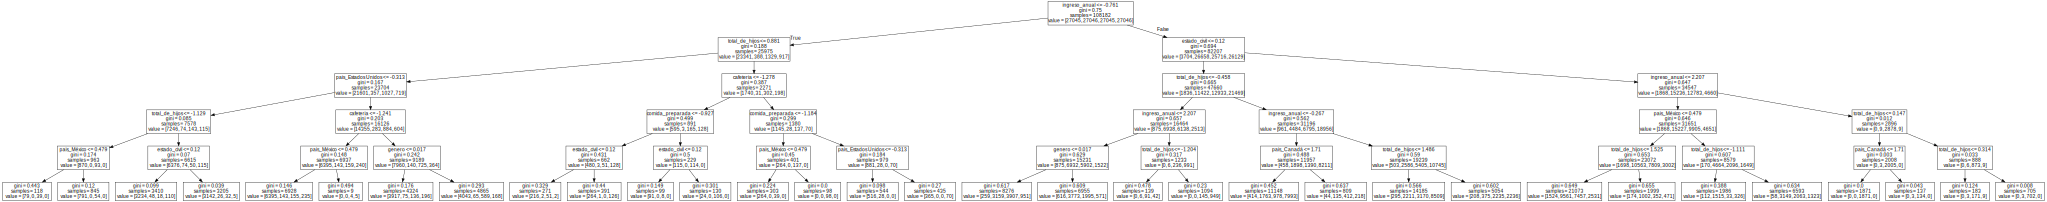

In [37]:
from sklearn.tree import export_graphviz
import graphviz

selected_features = columnas_modelo

X = df_modelos[selected_features]

features = X.columns
dot_data = export_graphviz(modelTree, feature_names = features)
grafico = graphviz.Source(dot_data)

grafico

#### Modelo k-nearest neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Inicializo el modelo KNN con la métrica euclidiana
knn = KNeighborsClassifier(metric='euclidean')

# Defino los DataFrames de características (X) y la variable objetivo (y)
x_knn = df_modelos.drop(columns='miembro', axis=1)
y_knn = df_modelos['miembro']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    x_knn,
    y_knn,
    test_size=0.25,        # Asigno el 25% de los datos al conjunto de prueba
    random_state=123       # Fijo una semilla para la reproducibilidad
)

# Entreno el modelo KNN con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
prediccion_knn = knn.predict(X_test)

# Evalúo el modelo utilizando la precisión (accuracy)
accuracy = accuracy_score(y_test, prediccion_knn)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.7758452391516549


#### Modelo Naive Bernoulli

In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Defino los DataFrames de características (X) y la variable objetivo (y)
x_ber = df_modelos.drop(columns='miembro', axis=1)
y_ber = df_modelos['miembro']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    x_ber,
    y_ber,
    test_size=0.25,        # Asigno el 25% de los datos al conjunto de prueba
    random_state=123       # Fijo una semilla para la reproducibilidad
)

# Determino la mediana de los valores de entrenamiento
mediana = np.median(X_train)

# Instancio el modelo Naive Bayes Bernoulli, utilizando la mediana para binarizar
bnb = BernoulliNB(binarize=mediana)

# Entreno el modelo con los datos de entrenamiento
bnb.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
prediccion_ber = bnb.predict(X_test)

# Evalúo el modelo utilizando la precisión (accuracy)
accuracy = accuracy_score(y_test, prediccion_ber)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.30277753128050405


# 5. Clusterización y validación

## Clasificación

### (1) Identificacion de comportamiento de clusteres

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def calcular_inercia_clusteres(datos):
    # Inicializo listas para almacenar las métricas de cada número de clústeres
    inercia = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []

    # Hago un barrido de 2 a 10 clústeres y calculo las métricas correspondientes
    for k in range(2, 11):
        # Instancio el modelo KMeans con k clústeres
        kmeans = KMeans(n_clusters=k)

        # Ajusto el modelo con los datos
        kmeans.fit(X=datos)

        # Aplico el modelo de predicción y almaceno las etiquetas de clúster
        train_cluster_labels = kmeans.fit_predict(datos)

        # Calculo el coeficiente de Silhouette para los datos de entrenamiento
        train_silhouette_avg = silhouette_score(datos, train_cluster_labels)

        # Calculo el índice Davies-Bouldin para los datos de entrenamiento
        train_davies_bouldin = davies_bouldin_score(datos, train_cluster_labels)

        # Calculo el índice Calinski-Harabasz para los datos de entrenamiento
        train_calinski_harabasz = calinski_harabasz_score(datos, train_cluster_labels)

        # Almaceno el valor de Silhouette en una lista
        silhouette_scores.append([k, train_silhouette_avg])

        # Almaceno el valor de Davies-Bouldin en una lista
        davies_bouldin_scores.append([k, train_davies_bouldin])

        # Almaceno el valor de Calinski-Harabasz en una lista
        calinski_harabasz_scores.append([k, train_calinski_harabasz])

        # Almaceno los valores de la inercia en la lista inercia
        inercia.append(kmeans.inertia_)

    # Retorno las listas con los valores de inercia y las métricas calculadas
    return [inercia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores]

Incorporamos los valores de entrenamiento y test a nuestra funcion de análisis de custeres y la inercia.

In [41]:
import warnings

# Suprimir todas las advertencias de tipo FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


#Dataframes de aspectos
x_ber = df_modelos.drop(columns='miembro', axis = 1)
y_ber = df_modelos['miembro']

#Generamos el modelo de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    x_ber,
    y_ber,
    test_size = 0.25,
    random_state = 123
)



#Calculamos el dataframe de la inercia
df_inercia = calcular_inercia_clusteres(X_train)

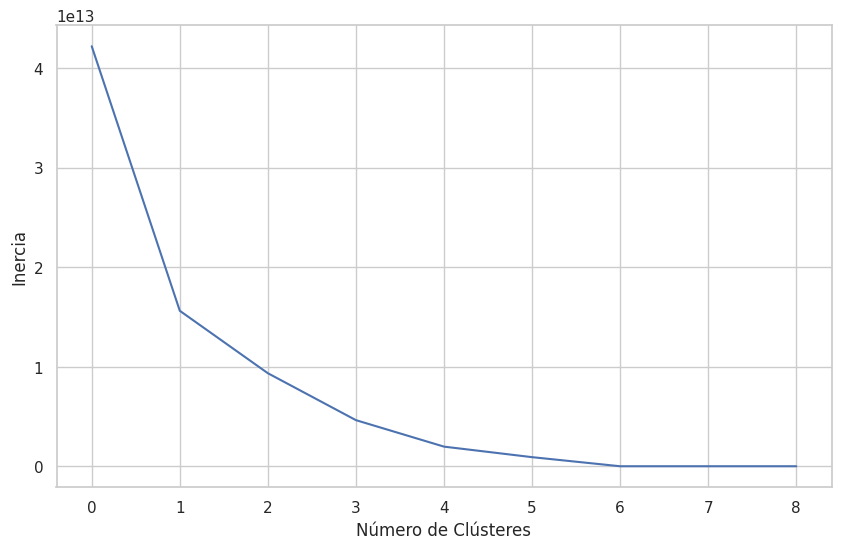

In [42]:
# Grafico el resultado del DataFrame de inercia

# Creo una figura para el gráfico de inercia con un tamaño específico
plt.figure(figsize=(10, 6))

# Grafico los valores de inercia almacenados en df_inercia[0]
plt.plot(df_inercia[0])

# Establezco la etiqueta del eje x
plt.xlabel('Número de Clústeres')

# Establezco la etiqueta del eje y
plt.ylabel('Inercia')

# Muestro el gráfico
plt.show()

### (2) Muestra dataframe de coeficientes para la determinacion de clusteres

In [44]:
# Crear un DataFrame a partir del array de coeficientes de siluette
df_siulette = pd.DataFrame(df_inercia[1], columns=['Clusteres', 'Siulette'])
df_davies_bouldin = pd.DataFrame(df_inercia[2], columns= ['Clusteres', 'Davies_Bouldin'])
df_calinski_harabasz = pd.DataFrame(df_inercia[3], columns= ['Clusteres', 'Calinski_Harabasz'])

df_siulette.sort_values('Siulette', ascending=False)

#Agrupamos los dataframes de cada coeficiente
merged_df = pd.merge(df_siulette, df_davies_bouldin, on='Clusteres', how='inner')
coeficientes = pd.merge(merged_df, df_calinski_harabasz, on = 'Clusteres', how = 'inner')

coeficientes

Clusteres  Siulette  Davies_Bouldin  Calinski_Harabasz
0          2  0.713545        0.404676       2.961074e+05
1          3  0.699098        0.490310       4.862493e+05
2          4  0.725310        0.403875       5.643758e+05
3          5  0.833650        0.408252       8.801797e+05
4          6  0.933292        0.301697       1.681812e+06
5          7  0.954857        0.235834       3.043836e+06
6          8  0.999864        0.000198       5.696743e+12
7          9  0.808005        0.259367       5.651717e+12
8         10  0.626504        0.486724       5.466059e+12


Según lo indicado, debemos filtrar el DataFrame de acuerdo a los siguientes criterios:

* El puntaje mínimo de Silhouette debe ser superior a 0.50.
* El puntaje de Davies-Bouldin debe ser inferior a 0.75.
* El puntaje de Calinski-Harabasz debe ser el más alto posible.


*Criterios específicos:*

* Silhouette: superior a 0.50
* Davies-Bouldin: inferior a 0.75
* Calinski-Harabasz: el valor más alto posible

In [45]:
# Filtrar el DataFrame según las condiciones dadas
# Selecciono las filas donde el puntaje de Silhouette es superior a 0.50
# y el puntaje de Davies-Bouldin es inferior a 0.75
filtered_df = coeficientes.query('Siulette > 0.50 and Davies_Bouldin < 0.75')

# Dentro del DataFrame filtrado, selecciono la fila con el valor más alto de Calinski-Harabasz
filtered_df = filtered_df.nlargest(1, 'Calinski_Harabasz')

# Imprimo el DataFrame filtrado para verificar los resultados
filtered_df

Clusteres  Siulette  Davies_Bouldin  Calinski_Harabasz
6          8  0.999864        0.000198       5.696743e+12

Según el análisis anterior, hemos determinado que utilizaremos un total de 8 clústeres, ya que este número coincide con los valores óptimos de las métricas evaluadas.

In [46]:
# Defino los DataFrames de características (X) y la variable objetivo (y)
x_ber = df_modelos.drop(columns='miembro', axis=1)
y_ber = df_modelos['miembro']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    x_ber,
    y_ber,
    test_size=0.25,        # Asigno el 25% de los datos al conjunto de prueba
    random_state=123       # Fijo una semilla para la reproducibilidad
)

# Instancio el modelo KMeans con 8 clústeres
kmeans = KMeans(n_clusters=8)

# Ajusto el modelo con los datos de entrenamiento
kmeans.fit(X=X_train)

# Aplico el modelo de predicción y almaceno las etiquetas de clúster
train_cluster_labels = kmeans.fit_predict(X_train)

# Agrego las etiquetas de clúster al DataFrame de entrenamiento
X_train['cluster'] = kmeans.labels_

# Agrego la inercia del modelo al DataFrame de entrenamiento
X_train['inertia'] = kmeans.inertia_

# Imprimo el DataFrame de entrenamiento para verificar los resultados
X_train

cafeteria  total_de_hijos  ingreso_anual  estado_civil  genero  \
80321         0.0             3.0          20000             0       0   
45238         1.0             1.0          40000             1       0   
57556         1.0             0.0          20000             1       1   
16011         1.0             3.0          80000             0       1   
41460         1.0             3.0          40000             0       1   
...           ...             ...            ...           ...     ...   
129130        1.0             4.0          40000             0       1   
119906        0.0             1.0          40000             1       1   
17730         1.0             3.0         140000             1       1   
28030         0.0             3.0          40000             1       0   
15725         1.0             2.0         120000             0       0   

        comida_preparada  tipo_Bebida  tipo_Comida  tipo_No comestible  \
80321                0.0        False         True               False   
45238                0.0        False         True               False   
57556                0.0        False         True               False   
16011                1.0         True        False               False   
41460                1.0        False         True               False   
...                  ...          ...          ...                 ...   
129130               1.0        False        False                True   
119906               1.0        False        False                True   
17730                1.0        False         True               False   
28030                0.0        False         True               False   
15725                1.0        False         True               False   

        pais_Canadá  pais_Estados Unidos  pais_México  cluster        inertia  
80321         False                 True        False        3  420440.367449  
45238         False                 True        False        1  420440.367449  
57556         False                False         True        3  420440.367449  
16011         False                 True        False        5  420440.367449  
41460         False                 True        False        1  420440.367449  
...             ...                  ...          ...      ...            ...  
129130        False                 True        False        1  420440.367449  
119906        False                 True        False        1  420440.367449  
17730         False                 True        False        6  420440.367449  
28030         False                 True        False        1  420440.367449  
15725          True                False        False        7  420440.367449  

[101421 rows x 14 columns]

In [47]:
from sklearn.decomposition import PCA

# Inicializo el modelo PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)

# Aplico PCA a los datos de entrenamiento y transformo los datos
pca_clientes = pca.fit_transform(X_train)

# Creo un DataFrame con las componentes principales obtenidas
pca_clientes_df = pd.DataFrame(
    data=pca_clientes,
    columns=['Componente1', 'Componente2']
)

# Concateno el DataFrame de componentes principales con las etiquetas de clúster
pca_miembros_clientes = pd.concat([pca_clientes_df, X_train[['cluster']]], axis=1)

# Elimino cualquier fila con valores nulos del DataFrame resultante
pca_miembros_clientes = pca_miembros_clientes.dropna(axis=0)

# Imprimo el DataFrame resultante para verificar los resultados
pca_miembros_clientes

Componente1  Componente2  cluster
0      -40775.381819    -0.675142      3.0
1      -20775.381855     1.838946      4.0
3       19224.618206    -1.735398      1.0
4      -20775.381853     1.594588      1.0
6      -20775.381853     1.499605      1.0
...              ...          ...      ...
101415 -40775.381818    -0.792114      1.0
101416 -20775.381853     1.501224      1.0
101417 -20775.381855     1.815610      5.0
101418  79224.618214    -1.742577      6.0
101419 -20775.381854     1.658171      1.0

[76026 rows x 3 columns]

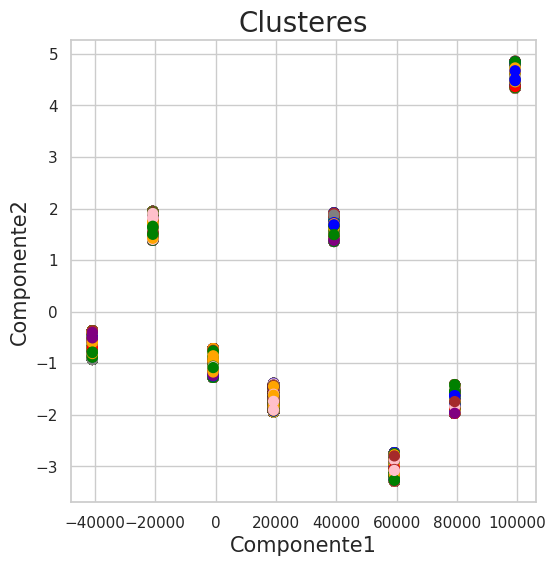

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Creo una figura para el gráfico de dispersión
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

# Establezco las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Componente1', fontsize=15)
ax.set_ylabel('Componente2', fontsize=15)
ax.set_title('Clusteres', fontsize=20)

# Defino un array de colores para cada clúster
color_theme = np.array(['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray'])

# Uso np.vectorize() para mapear los valores en la columna 'cluster' a índices enteros
color_indices = np.vectorize(lambda x: int(x))(pca_miembros_clientes['cluster'])

# Creo un gráfico de dispersión de las componentes principales coloreado por clústeres
ax.scatter(
    x=pca_miembros_clientes['Componente1'],
    y=pca_miembros_clientes['Componente2'],
    c=color_theme[color_indices],  # Asigno colores basados en los índices de clúster
    s=50  # Tamaño de los puntos
)

# Muestro el gráfico
plt.show()

# 6. Descripción de los clusters

## Conclusiones del Análisis de Clústeres
Después de aplicar técnicas de clustering a los datos de nuestros clientes y analizar los resultados, hemos identificado 8 clústeres con características distintivas.

## Conclusión
El análisis de clústeres nos ha proporcionado una visión valiosa sobre las distintas características y comportamientos de nuestros clientes. Al implementar las estrategias sugeridas, podemos mejorar significativamente la experiencia del cliente, aumentar la lealtad y optimizar nuestras campañas de marketing para obtener mejores resultados.